In [1]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "data/binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values

In [3]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]


In [4]:

# shuffle and reduce X_train by half
X_train = SFH_lev
numpy.random.shuffle(X_train)
#X_train = X_train[:len(X_train)//2]

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
print(X_train.shape)

# Reshape X_train to 2 dimensions
nSamples, nx, ny = X_train.shape
X_train = X_train.reshape((nSamples, nx*ny))



(91370, 6, 1)


Euclidean k-means
3.396 --> 2.343 --> 2.196 --> 2.166 --> 2.156 --> 2.150 --> 2.146 --> 2.143 --> 2.142 --> 2.141 --> 2.140 --> 2.139 --> 2.139 --> 2.138 --> 2.138 --> 2.137 --> 2.137 --> 2.137 --> 2.137 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 


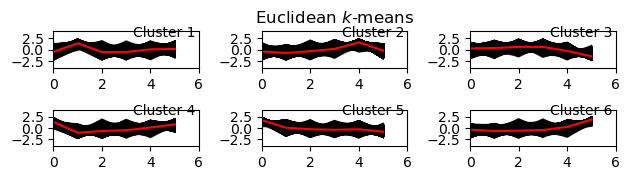

In [5]:

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed, n_jobs=-1)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(6):
    plt.subplot(6, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()


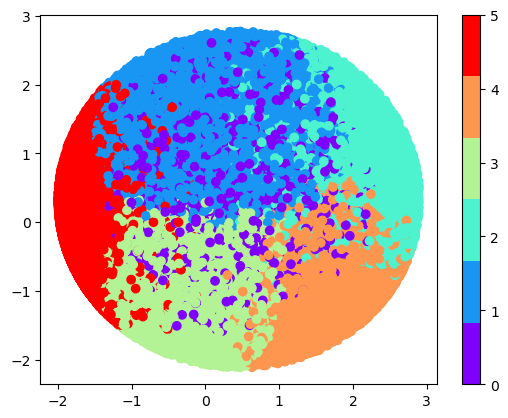

In [6]:
from matplotlib.colors import ListedColormap
# projection and display of data

# project to 2D for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

unique_labels = np.unique(y_pred)
num_labels = len(unique_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_labels))
cmap = ListedColormap(colors)

# plot data
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_pred, cmap=cmap)
plt.colorbar()
plt.show()